# Data frame; tables
In this task I will work with my own .csv file containing annotations of causal roles in Basque texts from different dialects and periods. 
Size: 19 columns * 2,337 rows.

In [1]:
import sqlite3
import csv
import pandas as pd

df = pd.read_csv('kausal.csv', sep=';',encoding='utf-8') # 
df.head()

,verse,English,Basque,gloss,marker,allomorph,kasu,role,category,semantics,remarks_morph,remarks_sem,text,author,year,century,period,place,dialect,Unnamed: 19
0,"(Mark 1,4)","John did baptize in the wilderness, and preach...",Joanes Bataiatzailea basamortuan agertu zen oi...,NaN,rako,NaN,DEST,Motive,NaN,abstract,NaN,NaN,Gospel of Mark - Labourdin,Etxehandi,2007.0,21.0,Contemporary,Labourd,Labourdin,NaN
1,"(Mark 1,38)","And he said unto them, Let us go into the next...","Goazen beste norapait, inguruko herrietarat, h...",NaN,ko,NaN,DEST,Motive,connector,NaN,NaN,NaN,Gospel of Mark - Labourdin,Etxehandi,2007.0,21.0,Contemporary,Labourd,Labourdin,NaN
2,"(Mark 2,4)",And when they could not come nigh unto him for...,Bainan jendaldeagatik ezin baitzuten Jesusenga...,NaN,gatik,NaN,CAUS,Force,NaN,people,NaN,negative,Gospel of Mark - Labourdin,Etxehandi,2007.0,21.0,Contemporary,Labourd,Labourdin,NaN
3,"(Mark 2,7)",Why doth this man thus speak blasphemies? who ...,Hori zergatik mintzo da hola?,NaN,gatik,NaN,CAUS,Cause,interrogative,NaN,NaN,negative,Gospel of Mark - Labourdin,Etxehandi,2007.0,21.0,Contemporary,Labourd,Labourdin,NaN
4,"(Mark 2,8)",Why reason ye these things in your hearts?,Zergatik dituzue gogoeta horiek zihauren baitan?,NaN,gatik,NaN,CAUS,Cause,interrogative,NaN,NaN,negative,Gospel of Mark - Labourdin,Etxehandi,2007.0,21.0,Contemporary,Labourd,Labourdin,NaN


I create a first table from my df, containing the most relevant linguistic information for the observations. The columns needed are: "verse", "Basque", "marker", "allomorph", "kasu", "role", "category"; hence I remove the rest:

In [2]:
table1 = df.drop(["English", "gloss", "semantics", "remarks_morph", "remarks_sem", "text", "author", "year", "century", "period", "place", "dialect", "Unnamed: 19"], axis=1) # The data about English version are not convenient, as they are provided for a limited number of observations.
table1.head()

,verse,Basque,marker,allomorph,kasu,role,category
0,"(Mark 1,4)",Joanes Bataiatzailea basamortuan agertu zen oi...,rako,NaN,DEST,Motive,NaN
1,"(Mark 1,38)","Goazen beste norapait, inguruko herrietarat, h...",ko,NaN,DEST,Motive,connector
2,"(Mark 2,4)",Bainan jendaldeagatik ezin baitzuten Jesusenga...,gatik,NaN,CAUS,Force,NaN
3,"(Mark 2,7)",Hori zergatik mintzo da hola?,gatik,NaN,CAUS,Cause,interrogative
4,"(Mark 2,8)",Zergatik dituzue gogoeta horiek zihauren baitan?,gatik,NaN,CAUS,Cause,interrogative


I create a second table from my df, containing more contextual information. The columns needed are: "verse", "text", "author", "year", "century", and "dialect"; hence I remove the rest:

In [3]:
table2 = df.drop(["Basque", "English", "gloss", "marker", "allomorph", "kasu", "role", "category", "semantics", "remarks_morph", "remarks_sem", "period", "place","Unnamed: 19"], axis=1) # The data about English version are not convenient, as they are provided for a limited number of observations.
table2.head()

,verse,text,author,year,century,dialect
0,"(Mark 1,4)",Gospel of Mark - Labourdin,Etxehandi,2007.0,21.0,Labourdin
1,"(Mark 1,38)",Gospel of Mark - Labourdin,Etxehandi,2007.0,21.0,Labourdin
2,"(Mark 2,4)",Gospel of Mark - Labourdin,Etxehandi,2007.0,21.0,Labourdin
3,"(Mark 2,7)",Gospel of Mark - Labourdin,Etxehandi,2007.0,21.0,Labourdin
4,"(Mark 2,8)",Gospel of Mark - Labourdin,Etxehandi,2007.0,21.0,Labourdin


Now I join both tables:

In [4]:
joined = table1.set_index('verse').join(table2.set_index('verse'))
joined.head()

,Basque,marker,allomorph,kasu,role,category,text,author,year,century,dialect
verse,,,,,,,,,,,
"(Etx ,396)",<zeren> bainiz satsuia.,ren,NaN,GEN,Cause,connector,Linguae Vasconum Primitiae,Etxepare,1545.0,16.0,Low_Navarrese
"(Etx I, 225)","hok begira ditzagula, salba giten <hegatik>.",gatik,NaN,CAUS,Motive,pronoun,Linguae Vasconum Primitiae,Etxepare,1545.0,16.0,Low_Navarrese
"(Etx I,12)",zerbitzatu behar dugu <emaitekoz gloria>,kotz,NaN,PURP,Purpose,nominalization,Linguae Vasconum Primitiae,Etxepare,1545.0,16.0,Low_Navarrese
"(Etx I,122)","Orduian nola zagoen haren arima tristia, haren...",z,NaN,INS,Cause,nominalization,Linguae Vasconum Primitiae,Etxepare,1545.0,16.0,Low_Navarrese
"(Etx I,128)",hek <nigatik> ziradela ari nuzu khonduia.,gatik,NaN,CAUS,Motive,pronoun,Linguae Vasconum Primitiae,Etxepare,1545.0,16.0,Low_Navarrese


From now on we will work with SQL. 
We connect, create the database "kausal", and verify if it works:

In [17]:
con = sqlite3.connect("kausal.db")
cur = con.cursor()
joined.to_sql(name='kausal', con=con, if_exists='replace')

for row in cur.execute('SELECT * FROM kausal'):
    print(row)    

('(Etx ,396)', '<zeren> bainiz satsuia.', 'ren', None, 'GEN', 'Cause', 'connector', 'Linguae Vasconum Primitiae', 'Etxepare', 1545.0, 16.0, 'Low_Navarrese')
('(Etx I, 225)', 'hok begira ditzagula, salba giten <hegatik>.', 'gatik', None, 'CAUS', 'Motive', 'pronoun', 'Linguae Vasconum Primitiae', 'Etxepare', 1545.0, 16.0, 'Low_Navarrese')
('(Etx I,12)', 'zerbitzatu behar dugu <emaitekoz gloria>', 'kotz', None, 'PURP', 'Purpose', 'nominalization', 'Linguae Vasconum Primitiae', 'Etxepare', 1545.0, 16.0, 'Low_Navarrese')
('(Etx I,122)', 'Orduian nola zagoen haren arima tristia, haren ama maitia eta mundu ororen habia, pena hetan <ekusteaz> bere seme maitia eta hiltzen begietan mundu ororen bizia.', 'z', None, 'INS', 'Cause', 'nominalization', 'Linguae Vasconum Primitiae', 'Etxepare', 1545.0, 16.0, 'Low_Navarrese')
('(Etx I,128)', 'hek <nigatik> ziradela ari nuzu khonduia.', 'gatik', None, 'CAUS', 'Motive', 'pronoun', 'Linguae Vasconum Primitiae', 'Etxepare', 1545.0, 16.0, 'Low_Navarrese')
(

('(Kap 69)', 'P: <Zegaiti> esaten deustezu onei arimeen arerioak; benturan pekatu eragin albaleie?', 'gatik', 'gaiti', 'CAUS', 'Cause', 'interrogative', 'Exposición breve de la doctrina christiana', 'Kapanaga', 1656.0, 17.0, 'Biscayan')
('(Kap 69)', 'P: <Zegaiti> esaten deustezu onei arimeen arerioak; benturan pekatu eragin albaleie?', 'gatik', 'gaiti', 'CAUS', 'Cause', 'interrogative', 'Exposición breve de la doctrina christiana', 'Kapanaga', 1656.0, 17.0, 'Biscayan')
('(Kap 69)', 'P: <Zegaiti> esaten deustezu onei arimeen arerioak; benturan pekatu eragin albaleie?', 'gatik', 'gaiti', 'CAUS', 'Cause', 'interrogative', 'Exposición breve de la doctrina christiana', 'Kapanaga', 1656.0, 17.0, 'Biscayan')
('(Kap 69)', 'P: <Zegaiti> esaten deustezu onei arimeen arerioak; benturan pekatu eragin albaleie?', 'gatik', 'gaiti', 'CAUS', 'Cause', 'interrogative', 'Exposición breve de la doctrina christiana', 'Kapanaga', 1656.0, 17.0, 'Biscayan')
('(Kap 69)', 'P: Bada, <zegaitik> permitietan dituz 

('(Mark 10,36)', 'Jesüsek galtatü zeien: «Zer nahi düzüe, arren nitarik?»', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - J. Kristoren Ebanjelio Saindua San Mark-en arauera', 'Haraneder', 1740.0, 18.0, 'Labourdin')
('(Mark 10,36)', 'Jesüsek galtatü zeien: «Zer nahi düzüe, arren nitarik?»', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Jesu-Kristoren Ebanjelio Saindua Marken arabera', 'Duvoisin', 1858.0, 19.0, 'Labourdin')
('(Mark 10,36)', 'Jesüsek galtatü zeien: «Zer nahi düzüe, arren nitarik?»', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - San Markosen Ebanjelioa', 'Uriarte', 1858.0, 19.0, 'Guipuscoan')
('(Mark 10,36)', 'Eta hark erran ziezén: Zer nahi duzue dagizuedan?', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Labourdin', 'Etxehandi', 2007.0, 21.0, 'Labourdin')
('(Mark 10,36)', 'Eta hark erran ziezén: Zer nahi duzue dagizuedan?', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Interconfessional Translation into Southern Standard Basqu

('(Mark 10,45)', 'Ezen gizonaren Semea ere ezta ethorri zerbitzatu izatera, baina zerbitzatzera, eta bere biziaren anhitzengatik ranzoinetan emaitera.', 'ra', None, 'ALL', 'Purpose', 'nominalization', 'Gospel of Mark - Jesu-Kristoren Ebanjelio Saindua Marken arabera', 'Duvoisin', 1858.0, 19.0, 'Labourdin')
('(Mark 10,45)', 'Ezen gizonaren Semea ere ezta ethorri zerbitzatu izatera, baina zerbitzatzera, eta bere biziaren anhitzengatik ranzoinetan emaitera.', 'ra', None, 'ALL', 'Purpose', 'nominalization', 'Gospel of Mark - Jesu-Kristoren Ebanjelio Saindua Marken arabera', 'Duvoisin', 1858.0, 19.0, 'Labourdin')
('(Mark 10,45)', 'Ezen gizonaren Semea ere ezta ethorri zerbitzatu izatera, baina zerbitzatzera, eta bere biziaren anhitzengatik ranzoinetan emaitera.', 'ra', None, 'ALL', 'Purpose', 'nominalization', 'Gospel of Mark - Jesu-Kristoren Ebanjelio Saindua Marken arabera', 'Duvoisin', 1858.0, 19.0, 'Labourdin')
('(Mark 10,45)', 'Ezen gizonaren Semea ere ezta ethorri zerbitzatu izatera, 

('(Mark 10,45)', 'Zeren gizonaren semea ere etzan etorri bera serbitua izatera, baizik serbitzera, eta askoren erredenzioagatik bere bizitza ematera.', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Jesus Kristen Ebanjelio Saindua S. Marken Araura', 'Leizarraga', 1571.0, 16.0, 'Labourdin')
('(Mark 10,45)', 'Zeren gizonaren semea ere etzan etorri bera serbitua izatera, baizik serbitzera, eta askoren erredenzioagatik bere bizitza ematera.', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Jesus Kristen Ebanjelio Saindua S. Marken Araura', 'Leizarraga', 1571.0, 16.0, 'Labourdin')
('(Mark 10,45)', 'Zeren gizonaren semea ere etzan etorri bera serbitua izatera, baizik serbitzera, eta askoren erredenzioagatik bere bizitza ematera.', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Jesus Kristen Ebanjelio Saindua S. Marken Araura', 'Leizarraga', 1571.0, 16.0, 'Labourdin')
('(Mark 10,45)', 'Zeren gizonaren semea ere etzan etorri bera serbitua izatera, baizik serbitzera, eta 

('(Mark 12,12)', 'Lege-maisu eta zaharrak Jesus atxilotu nahian zebiltzan, ongi jabetu baitziren beraiengatik esan zuela parabola hura. Baina, jendearen beldurrez, utzi eta alde egin zuten.', 'ren', None, 'GEN', 'Cause', None, 'Gospel of Mark - Interconfessional Translation into Souletin Basque', 'Casenave-Harigile', 2002.0, 21.0, 'Souletin')
('(Mark 12,12)', 'Lege-maisu eta zaharrak Jesus atxilotu nahian zebiltzan, ongi jabetu baitziren beraiengatik esan zuela parabola hura. Baina, jendearen beldurrez, utzi eta alde egin zuten.', 'ren', None, 'GEN', 'Cause', None, 'Gospel of Mark - Interconfessional Translation into Souletin Basque', 'Casenave-Harigile', 2002.0, 21.0, 'Souletin')
('(Mark 12,12)', 'Lege-maisu eta zaharrak Jesus atxilotu nahian zebiltzan, ongi jabetu baitziren beraiengatik esan zuela parabola hura. Baina, jendearen beldurrez, utzi eta alde egin zuten.', 'ren', None, 'GEN', 'Cause', None, 'Gospel of Mark - Interconfessional Translation into Souletin Basque', 'Casenave-Ha

('(Mark 13,13)', 'Eta gaitxetsiak izanen zarete mundu guziaz ene izena gatik; baiñan azkeneraiño iraunen duena izanen da salbatua.', 'gatik', None, 'CAUS', 'Cause', None, 'Gospel of Mark - Interconfessional Translation into Souletin Basque', 'Casenave-Harigile', 2002.0, 21.0, 'Souletin')
('(Mark 13,13)', 'Eta gaitxetsiak izanen zarete mundu guziaz ene izena gatik; baiñan azkeneraiño iraunen duena izanen da salbatua.', 'gatik', None, 'CAUS', 'Cause', None, 'Gospel of Mark - Jesus Kristen Ebanjelio Saindua S. Marken Araura', 'Leizarraga', 1571.0, 16.0, 'Labourdin')
('(Mark 13,13)', 'Eta gaitxetsiak izanen zarete mundu guziaz ene izena gatik; baiñan azkeneraiño iraunen duena izanen da salbatua.', 'gatik', None, 'CAUS', 'Cause', None, 'Gospel of Mark - J. Kristoren Ebanjelio Saindua San Mark-en arauera', 'Haraneder', 1740.0, 18.0, 'Labourdin')
('(Mark 13,13)', 'Eta gaitxetsiak izanen zarete mundu guziaz ene izena gatik; baiñan azkeneraiño iraunen duena izanen da salbatua.', 'gatik', None, 

('(Mark 14,1)', 'Bi egunen ondoan zan Pazkoa, noiz legamigabeak asitzen diraden, eta apaizburuak, eta Eskribak asmazio zerabiltzaten, nola Jesus saldukeriaz arrapatuko zuten, eta kenduko zioten bizia.', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Interconfessional Translation into Souletin Basque', 'Casenave-Harigile', 2002.0, 21.0, 'Souletin')
('(Mark 14,1)', 'Bi egunen ondoan zan Pazkoa, noiz legamigabeak asitzen diraden, eta apaizburuak, eta Eskribak asmazio zerabiltzaten, nola Jesus saldukeriaz arrapatuko zuten, eta kenduko zioten bizia.', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Jesus Kristen Ebanjelio Saindua S. Marken Araura', 'Leizarraga', 1571.0, 16.0, 'Labourdin')
('(Mark 14,1)', 'Bi egunen ondoan zan Pazkoa, noiz legamigabeak asitzen diraden, eta apaizburuak, eta Eskribak asmazio zerabiltzaten, nola Jesus saldukeriaz arrapatuko zuten, eta kenduko zioten bizia.', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - J. Kristoren Ebanjelio Saindua San

('(Mark 14,6)', 'Bainan Jesusek erran zioten: Utzazue; zergatik egiten diozue damurik? Niri hunek egina, ongi egina da.', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Labourdin', 'Etxehandi', 2007.0, 21.0, 'Labourdin')
('(Mark 14,6)', 'Bainan Jesusek erran zioten: Utzazue; zergatik egiten diozue damurik? Niri hunek egina, ongi egina da.', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Labourdin', 'Etxehandi', 2007.0, 21.0, 'Labourdin')
('(Mark 14,6)', 'Bainan Jesusek erran zioten: Utzazue; zergatik egiten diozue damurik? Niri hunek egina, ongi egina da.', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Interconfessional Translation into Southern Standard Basque', None, 2004.0, 21.0, 'Unified')
('(Mark 14,6)', 'Bainan Jesusek erran zioten: Utzazue; zergatik egiten diozue damurik? Niri hunek egina, ongi egina da.', 'NOT_APPLY', None, None, None, None, 'Gospel of Mark - Interconfessional Translation into Southern Standard Basque', None, 2004.0, 21.0, 'Unified')
('

('(Mark 2,16)', 'Farisau lege erakasle zonbaitek, bekatore eta legarkarieki jaten ari zela ikusirik, erran zeien dizipülüer: «Nolatan jaten dü legarkari eta bekatoreeki?» ', 'n', None, 'INE', 'Cause', 'interrogative', 'Gospel of Mark - San Markosen Ebanjelioa', 'Uriarte', 1858.0, 19.0, 'Guipuscoan')
('(Mark 2,16)', 'Eta Skribék eta Fariseuék ikhusirik publikanoekin eta jende bizitze gaixtotakoekin jaten zuela, erran ziezén haren diszipuluei, Zergatik publikanoekin eta bizitze gaixtotakoekin jaten du eta edaten?', 'gatik', None, 'CAUS', 'Cause', 'interrogative', 'Gospel of Mark - Labourdin', 'Etxehandi', 2007.0, 21.0, 'Labourdin')
('(Mark 2,16)', 'Eta Skribék eta Fariseuék ikhusirik publikanoekin eta jende bizitze gaixtotakoekin jaten zuela, erran ziezén haren diszipuluei, Zergatik publikanoekin eta bizitze gaixtotakoekin jaten du eta edaten?', 'gatik', None, 'CAUS', 'Cause', 'interrogative', 'Gospel of Mark - Interconfessional Translation into Southern Standard Basque', None, 2004.0, 2

('(Mark 3,26)', 'Era berean Satanasek ere, bere buruaren aurka jaiki eta zatiturik badago, ezin du iraun; harenak egin du.', 'ren_aurka', None, 'postp', 'Maleficiary', None, 'Gospel of Mark - Interconfessional Translation into Souletin Basque', 'Casenave-Harigile', 2002.0, 21.0, 'Souletin')
('(Mark 3,26)', 'Era berean Satanasek ere, bere buruaren aurka jaiki eta zatiturik badago, ezin du iraun; harenak egin du.', 'ren_aurka', None, 'postp', 'Maleficiary', None, 'Gospel of Mark - Jesus Kristen Ebanjelio Saindua S. Marken Araura', 'Leizarraga', 1571.0, 16.0, 'Labourdin')
('(Mark 3,26)', 'Era berean Satanasek ere, bere buruaren aurka jaiki eta zatiturik badago, ezin du iraun; harenak egin du.', 'ren_aurka', None, 'postp', 'Maleficiary', None, 'Gospel of Mark - J. Kristoren Ebanjelio Saindua San Mark-en arauera', 'Haraneder', 1740.0, 18.0, 'Labourdin')
('(Mark 3,26)', 'Era berean Satanasek ere, bere buruaren aurka jaiki eta zatiturik badago, ezin du iraun; harenak egin du.', 'ren_aurka', N

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




('II 39)', '<Zergatik> beraz ihor egün hoietan, beste ordiez beno gehiago, sobera jan edan, erhokeria eta gaiza debetatier senthatüki jarraikiten da?', 'gatik', None, 'CAUS', 'Cause', 'interrogative', 'Catechima laburra', 'Belapeire', 1696.0, 17.0, 'Souletin')
('II 39)', '<Zergatik> beraz ihor egün hoietan, beste ordiez beno gehiago, sobera jan edan, erhokeria eta gaiza debetatier senthatüki jarraikiten da?', 'gatik', None, 'CAUS', 'Cause', 'interrogative', 'Catechima laburra', 'Belapeire', 1696.0, 17.0, 'Souletin')
('II 4)', '<amorekatik> hala erakats dezagün', 'amoregatik', 'amorekatik', 'CAUS', 'Motive', 'connector', 'Catechima laburra', 'Belapeire', 1696.0, 17.0, 'Souletin')
('II 4)', '<amorekatik> hala erakats dezagün', 'amoregatik', 'amorekatik', 'CAUS', 'Motive', 'connector', 'Catechima laburra', 'Belapeire', 1696.0, 17.0, 'Souletin')
('II 4)', '<amorekatik> hala erakats dezagün', 'amoregatik', 'amorekatik', 'CAUS', 'Motive', 'connector', 'Catechima laburra', 'Belapeire', 1696.

# Queries

In [18]:
joined.head()

,Basque,marker,allomorph,kasu,role,category,text,author,year,century,dialect
verse,,,,,,,,,,,
"(Etx ,396)",<zeren> bainiz satsuia.,ren,NaN,GEN,Cause,connector,Linguae Vasconum Primitiae,Etxepare,1545.0,16.0,Low_Navarrese
"(Etx I, 225)","hok begira ditzagula, salba giten <hegatik>.",gatik,NaN,CAUS,Motive,pronoun,Linguae Vasconum Primitiae,Etxepare,1545.0,16.0,Low_Navarrese
"(Etx I,12)",zerbitzatu behar dugu <emaitekoz gloria>,kotz,NaN,PURP,Purpose,nominalization,Linguae Vasconum Primitiae,Etxepare,1545.0,16.0,Low_Navarrese
"(Etx I,122)","Orduian nola zagoen haren arima tristia, haren...",z,NaN,INS,Cause,nominalization,Linguae Vasconum Primitiae,Etxepare,1545.0,16.0,Low_Navarrese
"(Etx I,128)",hek <nigatik> ziradela ari nuzu khonduia.,gatik,NaN,CAUS,Motive,pronoun,Linguae Vasconum Primitiae,Etxepare,1545.0,16.0,Low_Navarrese


QUERY 1. We want to know in which examples the semantic role Force is encoded:

In [19]:
x = ('Force',)
for row in cur.execute('SELECT Basque FROM kausal WHERE role=?', x):
    print(row)

('Eta lurra izigarri oro ikharaturik, zuhamuiek dakartela odolezko izerdi; <tenpestatez>, igortziriz, aire oro samurrik; mendi eta harri oro elgar zatikaturik; mundu oro jarriren da suiak arrasaturik.',)
('Eta lurra izigarri oro ikharaturik, zuhamuiek dakartela odolezko izerdi; <tenpestatez>, igortziriz, aire oro samurrik; mendi eta harri oro elgar zatikaturik; mundu oro jarriren da suiak arrasaturik.',)
('Eta lurra izigarri oro ikharaturik, zuhamuiek dakartela odolezko izerdi; tenpestatez, <igortziriz>, aire oro samurrik; mendi eta harri oro elgar zatikaturik; mundu oro jarriren da suiak arrasaturik.',)
('Eta lurra izigarri oro ikharaturik, zuhamuiek dakartela odolezko izerdi; tenpestatez, <igortziriz>, aire oro samurrik; mendi eta harri oro elgar zatikaturik; mundu oro jarriren da suiak arrasaturik.',)
('neure amore xotiltua galdu dudan <beldurrez>',)
('gaoaz lorik ezin daidit <haren gogoanbeharrez>',)
('<haren minez> orai nago ezin hilez bizirik.',)
('<bortxaz> ere gaizki bano hongi

QUERY 2. Now we can ask which instances of Force are encoded by the causal case-marker (since Force can be encoded by different case-markers):

In [20]:
x = ('Force',)
for row in cur.execute('SELECT Basque FROM kausal WHERE kasu="CAUS" AND role=?', x):
    print(row)

('Bainan jendaldeagatik ezin baitzuten Jesusenganaino ereman, hura zagon parean etxegaina urratu eta zilotik beheiti jautsi zuten parlesiatua etzanik zagon ohetxoa. ',)
('Bainan jendaldeagatik ezin baitzuten Jesusenganaino ereman, hura zagon parean etxegaina urratu eta zilotik beheiti jautsi zuten parlesiatua etzanik zagon ohetxoa. ',)
('Bainan jendaldeagatik ezin baitzuten Jesusenganaino ereman, hura zagon parean etxegaina urratu eta zilotik beheiti jautsi zuten parlesiatua etzanik zagon ohetxoa. ',)
('Bainan jendaldeagatik ezin baitzuten Jesusenganaino ereman, hura zagon parean etxegaina urratu eta zilotik beheiti jautsi zuten parlesiatua etzanik zagon ohetxoa. ',)
('Bainan jendaldeagatik ezin baitzuten Jesusenganaino ereman, hura zagon parean etxegaina urratu eta zilotik beheiti jautsi zuten parlesiatua etzanik zagon ohetxoa. ',)
('Bainan jendaldeagatik ezin baitzuten Jesusenganaino ereman, hura zagon parean etxegaina urratu eta zilotik beheiti jautsi zuten parlesiatua etzanik zagon

Query 3. Now we can have a look at the instances of Motive conveyed by case-markers OTHERS than the causal (CAUS).

In [21]:
x = ('Motive',)
for row in cur.execute('SELECT Basque FROM kausal WHERE kasu NOT LIKE "CAUS" AND role=?', x):
    print(row)

('<zeren> hanbat bekhatutan deramagu bizia eta guhaurk gure faltaz galtzen gure buruia?',)
('<Zeren> dabil haren kontra, bada, bekhatoria?',)
('<Zeren> dabil haren kontra, bada, bekhatoria?',)
('<bekhatuiez> egiteko unsa penitenzia',)
('<bekhatuiez> egiteko unsa penitenzia',)
('<Zeren> unsa orhit ziten nizaz, ama eztia, gogo honez erranen dut zuri Ave Maria.',)
('<Zeren>, bada, erho gira gaixo bekhatariak?',)
('<zeren>, bada, hon deritzat hon ezteriztanari?',)
('<Kortesiaz> hon deritzut nik zuri hain segurki',)
('Ea bere burua alabadu dabeenz <egin eban pekatuagaz>',)
('Ea bere burua alabadu dabeenz <egin eban pekatuagaz>',)
('Ea bere burua alabadu dabeenz <egin eban pekatuagaz>',)
('Apetitu eta deseo torpe bat <aragien pekaturako>.',)
('Goazen beste norapait, inguruko herrietarat, horietan ere berriona oihuka dezatan, hortako atera bainaiz.',)
('Goazen beste norapait, inguruko herrietarat, horietan ere berriona oihuka dezatan, hortako atera bainaiz.',)
('Goazen beste norapait, inguruk

Query 4. We want to know which texts written in the Labourdin dialect show instances of Motive encoded by the BEN case-marker; we also want to range results chronologically (the column "year" is the pertinent numeric variable in the database). 

In this query I use the GROUP BY clause followed by a HAVING clause (adds a condition) to filter grouped rows from the results set.

In [22]:
for row in cur.execute('SELECT text FROM kausal WHERE kasu="BEN" AND role="Motive" GROUP BY year HAVING dialect="Labourdin"'):
    print(row)

('Gospel of Mark - Jesus Kristen Ebanjelio Saindua S. Marken Araura',)
('Gospel of Mark - J. Kristoren Ebanjelio Saindua San Mark-en arauera',)
('Gospel of Mark - Jesu-Kristoren Ebanjelio Saindua Marken arabera',)
('Gospel of Mark - Labourdin',)


QUERY 5. I want to add a new row. As this new obervation if from a new text, after the insertion I will ask to print the text of the example by invoking the author's name as a condition:

In [23]:
cur.execute('''
INSERT INTO kausal 
VALUES 
('Lk 1,17', 'Aingüriak elhe horiek erran zütian <Mariaren boztariuarentako>.', 'tako', 'NA', 'BEN', 'Motive', 'noun', 'Jesü-Kristen ebanjeliua', 'Anna Urruthy', 1883, 19, 'Souletin') 
'''
)

x = ('Anna Urruthy',)
for row in cur.execute('SELECT Basque FROM kausal WHERE author=?', x):
    print(row)
     

('Aingüriak elhe horiek erran zütian <Mariaren boztariuarentako>.',)


QUERY 6. We want to know the number of observations in which the role Motive is encoded by the BEN case in two dilects. For this purpose we need to use the COUNT clause.

In [26]:
for row in cur.execute('SELECT COUNT(text) FROM kausal WHERE kasu="BEN" AND role="Motive" GROUP BY dialect HAVING dialect="Labourdin"'):
    print(row)
for row in cur.execute('SELECT COUNT(text) FROM kausal WHERE kasu="BEN" AND role="Motive" GROUP BY dialect HAVING dialect="Souletin"'):
    print(row)  
con.close()    

(128,)
(48,)


# Visualization

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23

# 1

The first plot displays the number of occurrences of every semantic role annotated in the dataframe. The most frequent is Cause, followed by Purpose and Motive. 

Cause           4791
Purpose         2906
Motive          2828
Beneficiary     1413
Maleficiary     1182
Quality          456
Force            224
Distributive     135
Time             102
Concesive         65
Behalf            64
Topic             31
Recipient         16
Means             15
???                9
Agent              8
Name: role, dtype: int64

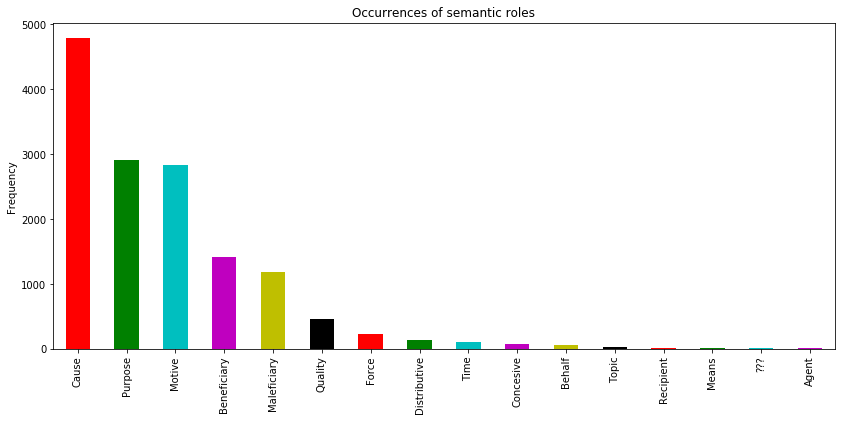

In [28]:
plt.figure(figsize=(14, 6))
joined["role"].value_counts().plot.bar(color=['r', 'g', 'c', 'm', 'y', 'k']); 
plt.title('Occurrences of semantic roles')
plt.ylabel('Frequency');

joined["role"].value_counts()

# 2

Even though the following IS NOT the appropriate way to use a boxplot, I will try to visualize the chronological distribution of the observations for every semantic role in the data frame. The reason is that I did not manage to do it by means of a simple histogram (I tried it for a given role, but honestly could not get it).

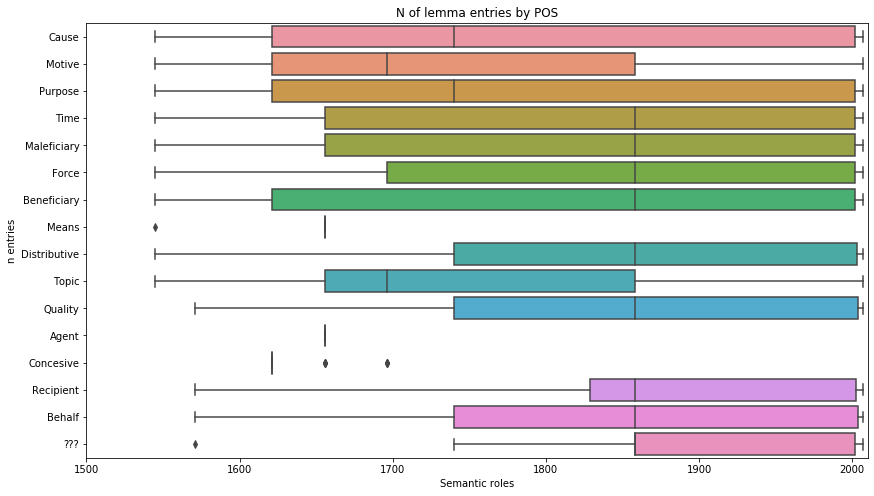

In [29]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="year", y="role", data=joined)
plt.xlim((1500, 2010))
plt.title('N of lemma entries by POS')
plt.ylabel('n entries')
plt.xlabel('Semantic roles');

# 3
The following plot visualizes the proportion of the different cases involved in the expression of causal roles:

CAUS         4483
REL          1619
GEN          1431
INS          1419
postp        1337
BEN          1312
ALL          1109
DEST          336
INE           331
ESS           274
ABS            98
PURP           80
DAT            73
COM            49
sub_add        42
sub_postp      28
ABL             7
add             7
Name: kasu, dtype: int64

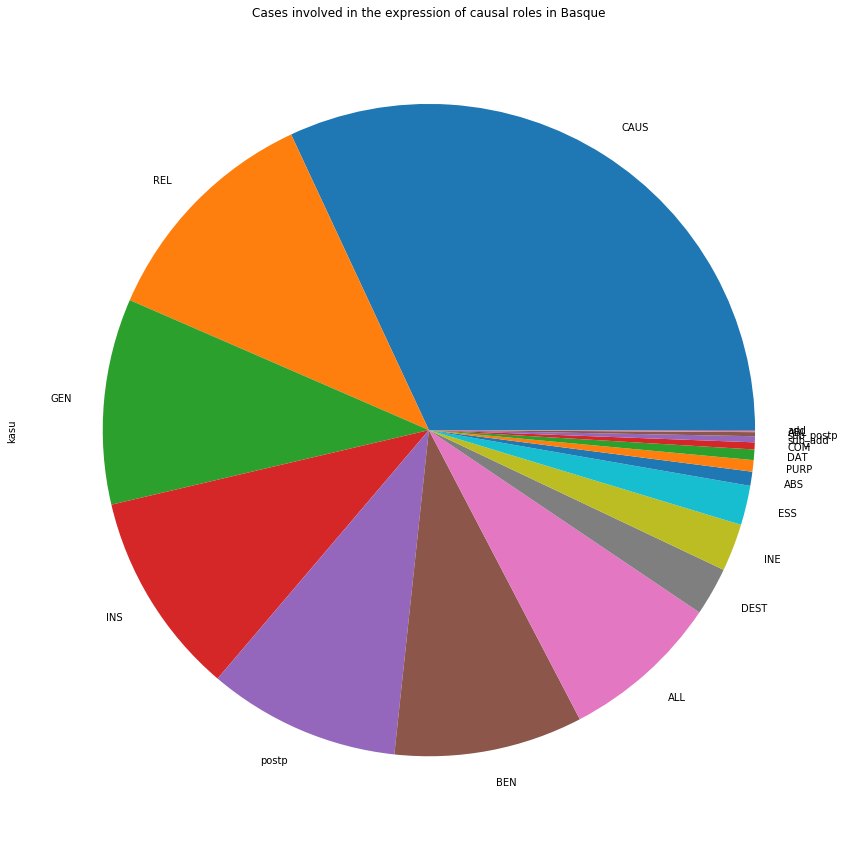

In [30]:
plt.figure(figsize=(15, 15))
joined['kasu'].value_counts().plot(kind='pie');
plt.title('Cases involved in the expression of causal roles in Basque');

joined["kasu"].value_counts()

# 4
The following plot visualizes the weight of different dialects represented in my observations.

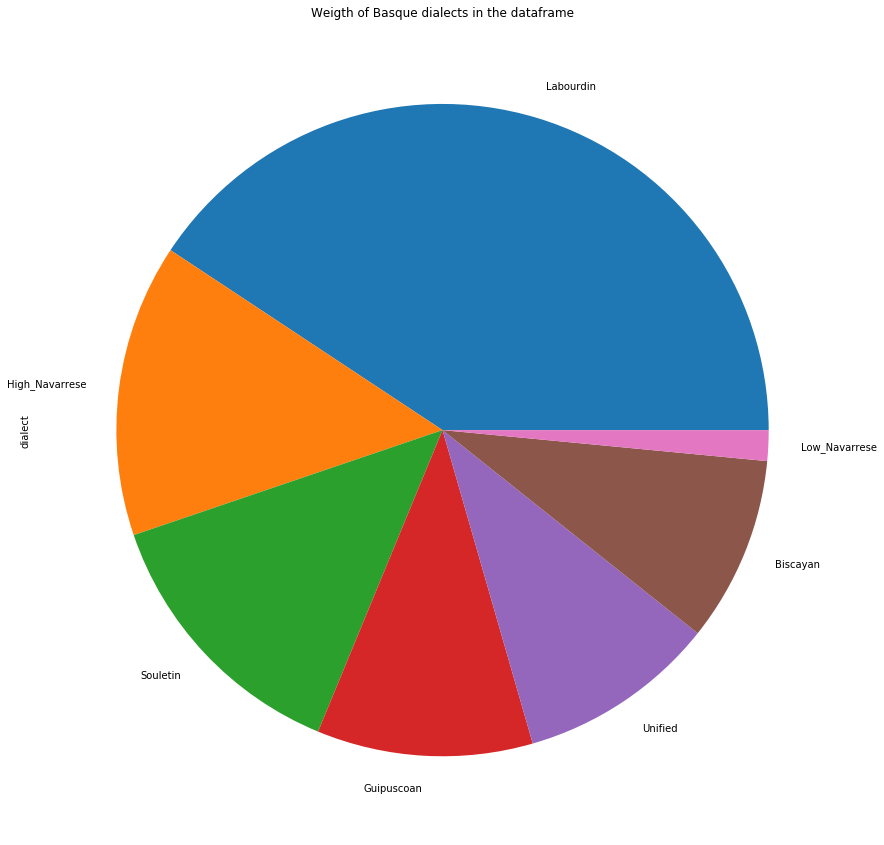

In [31]:
plt.figure(figsize=(15, 15))
joined['dialect'].value_counts().plot(kind='pie');
plt.title('Weigth of Basque dialects in the dataframe');